In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# EDA
# Uni Varient Analysis --> Count plot , Scatterplot, Distribution
# Bi-Varient --> IMP columns Relation b/w Target Column And Independent Column
# Categorical data into --> Numerical format
# Numerical data --> Feature scaling
# Load Model --> Pred

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
df_copy = df.copy()

In [9]:
df.drop('loan_id', axis=1, inplace=True)

In [15]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [16]:
df[' no_of_dependents'].unique()

array([2, 0, 3, 5, 4, 1], dtype=int64)

In [18]:
for i in df.columns:
    print(i, df[i].unique())
    print('-'*80)

 no_of_dependents [2 0 3 5 4 1]
--------------------------------------------------------------------------------
 education [' Graduate' ' Not Graduate']
--------------------------------------------------------------------------------
 self_employed [' No' ' Yes']
--------------------------------------------------------------------------------
 income_annum [9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000

In [20]:
df[' education'] = df[' education'].map({' Graduate':1, ' Not Graduate':0})

In [21]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [23]:
df[' self_employed'] = df[' self_employed'].map({' Yes':1, ' No':0})

In [25]:
df[' loan_status'] = df[' loan_status'].map({' Approved':1, ' Rejected':0})

In [26]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,0.004918
self_employed,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.007376,0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,-0.001531,-0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246
luxury_assets_value,0.002817,0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.015465


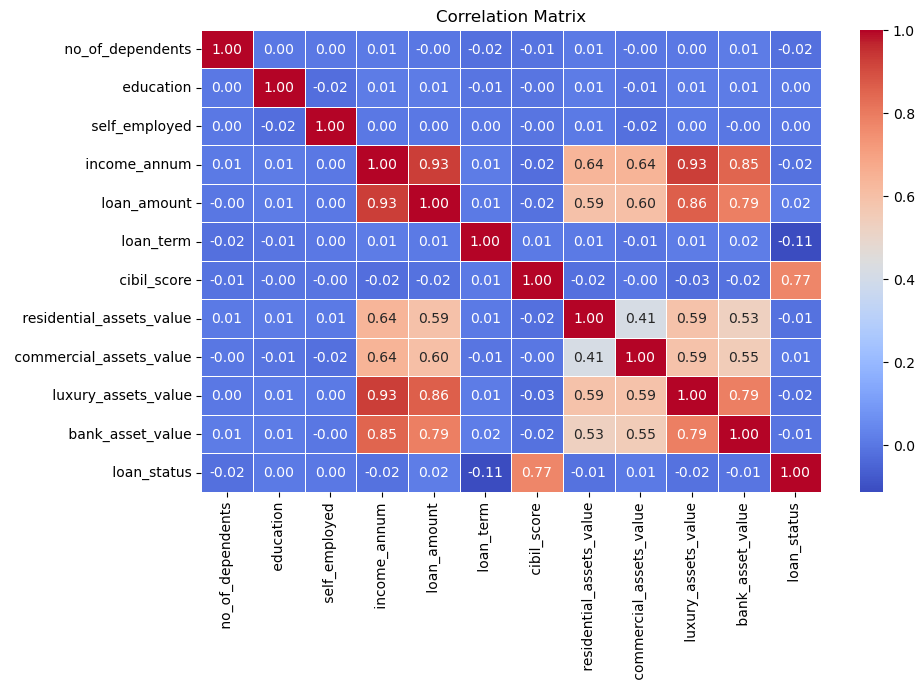

In [31]:
# Heatmap Corr
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [33]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [34]:
X = df.iloc[:, :-1]
y= df[' loan_status']

In [35]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [36]:
scalar = StandardScaler()

In [37]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [38]:
# Model building

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test_scaled)

In [42]:
ac_score = accuracy_score(y_test, y_pred)

In [44]:
print(ac_score)

0.905152224824356


In [45]:
report = classification_report(y_test,y_pred)

In [46]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

